# Research of earthquake
###  Earthquake (Björn Bauer, 19.11.2021)

#### Project Summary

Grundsätzliches Ziel der Aufgabe ist das erforschen von Erdbeben-Daten der letzte 2 Jahre. Dabei sind die Hauptfragen, die durch die Analyse der
Daten geklärt werden sollen:
-          how likely it's that in places where there have already been earthquakes there will be more earthquakes? What would be the trend in 10 years?

-          Whether there are special places where earthquakes occur certain strength piling. 

-          A correlation between values such as depth and strength (or other values related to strength)

Ziel ist es, mögliche Muster in scheinbar zufälligen Ereignissen zu finden und falls möglich vorhersagen über die Zuunft zu treffen.

-- 1.       Processing Data: please specify

Steps to solve:

1.1.  Perform EDA for the provided data 

a.       Perform EDA 

b.       Compute the Pearson correlation coefficient. Which conclusion can you make? 

1.2.  Linear regression 

a.                   Define linear function for your analysis. That is, f=ai+b, where a is the slope and b is the intercept. So find the best fit line using np.polyfit().

 

b.                   Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

1.3.  How is it optimal?

a.                   The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). Plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal? What does it mean for the research?

1.4.  Pairs bootstrap or permutation? 

a.                   Perform pairs bootstrap or permutation to plot a histogram describing the estimate of the slope from the  data. Also report the 95% confidence interval of the slope.

1.5. Plotting bootstrap or permutation regressions 

a.                   A nice way to visualize the variability we might expect in a linear regression is to plot the line you would get from each replicate of the slope and intercept. Do this for the first 100 of your replicates of the slope and intercept

1.6.  Hypothesis test on Pearson correlation

a.                   Formulate Hypothesis and Test it. Provide a conclusion for it

1.7.  Provide the conclusion of your earthquake research. Is it possible to perfume here A/B Test? What it can show? What confidence intervals and p-values show us in regard to testing of Null-hypothesis?

1.8. What shows us a Bonferroni test? Use: https://www.investopedia.com/terms/b/bonferroni-test.asp

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data (perform EDA, provide error handlings, unit tests, data quality tests, etc)
* Step 3: Define the Data Model/ Null/Alternative Hypothesis
* Step 4: Show the Model of  Data and any conclutions
* Step 5: Complete Project Write Up

In [1]:
# Do all imports and installs here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import warnings
from sympy import S, symbols, printing
from statsmodels.sandbox.stats.multicomp import multipletests
#für Chi-Quadrat nötig
#from scipy.stats import chi2_contingency
#from scipy.stats import chi2
pd.options.mode.chained_assignment = None

### Step 1: Scope the Project and Gather Data

#### Scope 
Explain what you plan to do in the project in more detail. What data do you use? What is your end solution look like? What tools did you use? etc>

- Neben der gestellten Aufgabenstellung ist das Hauptziel die BEantwortung der Forschungsfragen und der Versuch Muster in einem normalerweise zufällig erscheinenden Verhalten zu finden
- Durch gezielte Visualisierung sollen Muster erkannt werden
- Endsolution soll im Idealfall Graphisch die Hauptfragen der Arbeit beantworten
- Tool hierfür ist die Programmiersprache Python und die Module pandas, Seaborn, numpy, mathplotlip.pyplot

#### Describe and Gather Data 
Describe the data sets you're using. Where did it come from? What type of information is included? 
- Die Daten in diesem Projekt handeln von Erdbeben, die Tiefe, die Location, wann Sie aufgetreten sind, die Stärke
- Die Grunddaten lassen keine Daten aus, die in Bezug auf die Analyse von Erbeben wichtig sind, außer Phsikalische Parameter wie Geschwindigkeit der Wellenfortbewegung und Art des Gesteins. Beides ist für die Fragestellung nicht von Bedeutung
    - In dem Cleaning Step werden Daten die für die Analyse nicht benötigt werden entfernt
- Quelle der Daten: https://www.usgs.gov/natural-hazards/earthquake-hazards/earthquakes
    - Hier können verschiedene Daten abgefragt werden, in diesem Fall geht es um die Daten der letzten 2 Jahre und Erbeben der Starke 2.5 und höher
    - Daten sind nur von Stationen die mit dem United State Geological Service zusammenarbeiten, es kann nicht ausgeschlossen werden das Daten fehlen
    

In [2]:
# Read in the data here

#Einlesen der Daten, das USGS erlaubt nur Querrys mit max. 20000 Daten. Für die letzten 2 Jahre werden ca. 80000 Daten benötigt
earthquake1=pd.read_csv("Erdbeben1.csv")
earthquake2=pd.read_csv("Erdbeben2.csv")
earthquake3=pd.read_csv("Erdbeben3.csv")
earthquake4=pd.read_csv("Erdbeben4.csv")
earthquake5=pd.read_csv("Erdbeben5.csv")




In [3]:
#ausgeben der Spaltennamen
earthquake1.head()
#Vor dem Einlesen der csv wurde überprüft, ob die Tabellen von den Spalten aus identisch sind

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2021-11-15T23:15:09.192Z,39.5810,93.4733,10.00,4.00,mb,NaN,84.0,10.883,0.77,...,2021-11-16T01:40:25.040Z,"Xinjiang-Gansu-Qinghai border region, China",earthquake,11.40,2.00,0.119000,19.0,reviewed,us,us
1,2021-11-15T22:31:01.794Z,-21.9775,-68.8490,120.54,4.30,mb,NaN,39.0,0.841,0.76,...,2021-11-15T23:22:51.040Z,"53 km N of Calama, Chile",earthquake,5.40,7.50,0.153000,12.0,reviewed,us,us
2,2021-11-15T22:21:57.320Z,19.2280,-155.3925,32.78,2.53,ml,55.0,147.0,NaN,0.12,...,2021-11-16T10:14:17.224Z,"9 km ENE of P?hala, Hawaii",earthquake,0.41,0.49,0.205976,23.0,reviewed,hv,hv
3,2021-11-15T21:03:50.184Z,-24.1464,-67.3736,191.09,4.60,mb,NaN,66.0,1.399,0.84,...,2021-11-15T22:25:09.040Z,"107 km W of San Antonio de los Cobres, Argentina",earthquake,8.00,11.20,0.173000,10.0,reviewed,us,us
4,2021-11-15T20:48:38.982Z,-37.5540,51.0543,10.00,4.70,mb,NaN,50.0,8.889,0.78,...,2021-11-15T22:27:23.040Z,South Indian Ocean,earthquake,7.40,1.70,0.084000,43.0,reviewed,us,us


In [4]:
#Überprüfen ob alle Spaltennamen ausgegeben wurden
for col in earthquake1.columns:
    print(col)

# Information about this topics: https://earthquake.usgs.gov/data/comcat/data-eventterms.php

#time: Wann ist das Erdbeben passiert
#latidude: Geographische Koordinate
#longitude: Geographische Koordinate
#depth: Tiefe des Erdbeben
#mag: Stärke auf Richterskala
#magType: Magnitude Types (More Infos: https://www.usgs.gov/natural-hazards/earthquake-hazards/science/magnitude-types?qt-science_center_objects=0#qt-science_center_objects)
#nst: Number of seismic stations which reported P- and S-arrival times for this earthquake
#gap: azimuthal gap
#dmin: Horizontal distance from the epicenter to the nearest station
#rms: root-mean-squared residual of solution
#net: The ID of a data contributor
#id: A unique identifier for the event
#updated: time when the event was most recently updated
#place: Textual description of named geographic region near to the event
#type: Type of seismic event
#horizontalError: he horizontal location error, in km, defined as the length of the largest projection of the three principal errors on a horizontal plane
#depthError: The depth error, in km, defined as the largest projection of the three principal errors on a vertical line
#magError: Uncertainty of reported magnitude of the event
#magNST: The total number of seismic stations used to calculate the magnitude for this earthquake
#status: Status is either automatic or reviewed
#locationSource: Decimal degrees longitude. Negative values for western longitudes
#magSource: The method or algorithm used to calculate the preferred magnitude for the event

time
latitude
longitude
depth
mag
magType
nst
gap
dmin
rms
net
id
updated
place
type
horizontalError
depthError
magError
magNst
status
locationSource
magSource


In [5]:
#Genutzt um Tabelle anzuzeigen, für das eigentliche Programm nicht zwingend nötig
#earthquake

### Step 2: Explore and Assess the Data
#### Explore the Data 
Identify data quality issues, like missing values, duplicate data, etc.

#### Cleaning Steps
Document steps necessary to clean the data

In [6]:
# Aufteilen des Inhalts der Place Spalte für eine Leichtere Analyse im Späteren Verlauf, muss auf jedes Ursprüngliche Dataframe ausgeführt werden 
# Neue Spalte earthquake1
earthquake1['Region']=earthquake1['place']

#Länge der Tabelle
size=earthquake1['Region'].size
#Füllen der neuen Spalte
for x in range(size):
    #Leere Spalten überspringen
    if isinstance(earthquake1['Region'][x], float):
        continue
    #Aufteilen des Inhalts in Region anhand der Kommas    
    Region = earthquake1['Region'][x].split(',', 2)
    #Es wird der letzte Teil des Splits benötigt der entwerder 3 oder 2 Lang ist
    #Länge 2
    if len(Region)==1:
        earthquake1['Region'][x]=Region[0]
    #Länge 3    
    if len(Region)==2:
        earthquake1['Region'][x]=Region[1] 
        
#Aufteilen der time für leichtere Analyse muss vor concat gemacht werden

# Erstellen neuer Spalten gleicher Größe
earthquake1['Jahr']=earthquake1['place']
earthquake1['Monat']=earthquake1['place']
earthquake1['Tag']=earthquake1['place']
earthquake1['Total']=earthquake1['place']

#Aufteilen der Zeit
size=earthquake1['Region'].size
for x in range(size):
    time=earthquake1['time'][x]
    Jahr=time[0:4]
    earthquake1['Jahr'][x]=Jahr    
    Monat=time[5:7]
    earthquake1['Monat'][x]=Monat
    Tag=time[9:10]
    earthquake1['Tag'][x]=Tag
    Total=time[0:10]
    earthquake1['Total'][x]=Total
    


In [7]:
# Neue Spalte earthquake2
earthquake2['Region']=earthquake2['place']

#Länge der Tabell
size=earthquake2['Region'].size
#Füllen der neuen Spalte
for x in range(size):
    #Leere Spalten überspringen
    if isinstance(earthquake2['Region'][x], float):
        continue
    #Aufteilen des Inhalts in Region anhand der Kommas    
    Region = earthquake2['Region'][x].split(',', 2)
    #Es wird der letzte Teil des Splits benötigt der entwerder 3 oder 2 Lang ist
    #Länge 2
    if len(Region)==1:
        earthquake2['Region'][x]=Region[0]
    #Länge 3    
    if len(Region)==2:
        earthquake2['Region'][x]=Region[1]
        
        
#Aufteilen der time für leichtere Analyse muss vor concat gemacht werden
earthquake2['Jahr']=earthquake2['place']
earthquake2['Monat']=earthquake2['place']
earthquake2['Tag']=earthquake2['place']
earthquake2['Total']=earthquake2['place']

#Aufteilen der Zeit
size=earthquake2['Region'].size
for x in range(size):
    time=earthquake2['time'][x]
    Jahr=time[0:4]
    earthquake2['Jahr'][x]=Jahr    
    Monat=time[5:7]
    earthquake2['Monat'][x]=Monat
    Tag=time[9:10]
    earthquake2['Tag'][x]=Tag
    Total=time[0:10]
    earthquake2['Total'][x]=Total

In [8]:
# Neue Spalte earthquake3
earthquake3['Region']=earthquake3['place']

#Länge der Tabelle
size=earthquake3['Region'].size
#Füllen der neuen Spalte
for x in range(size):
    #Leere Spalten überspringen
    if isinstance(earthquake3['Region'][x], float):
        continue
    #Aufteilen des Inhalts in Region anhand der Kommas    
    Region = earthquake3['Region'][x].split(',', 2)
    #Es wird der letzte Teil des Splits benötigt der entwerder 3 oder 2 Lang ist
    #Länge 2
    if len(Region)==1:
        earthquake3['Region'][x]=Region[0]
    #Länge 3    
    if len(Region)==2:
        earthquake3['Region'][x]=Region[1]
       
    
#Aufteilen der time für leichtere Analyse muss vor concat gemacht werden
earthquake3['Jahr']=earthquake3['place']
earthquake3['Monat']=earthquake3['place']
earthquake3['Tag']=earthquake3['place']
earthquake3['Total']=earthquake3['place']

#Aufteilen der Zeit
size=earthquake3['Region'].size
for x in range(size):
    time=earthquake3['time'][x]
    Jahr=time[0:4]
    earthquake3['Jahr'][x]=Jahr    
    Monat=time[5:7]
    earthquake3['Monat'][x]=Monat
    Tag=time[9:10]
    earthquake3['Tag'][x]=Tag
    Total=time[0:10]
    earthquake3['Total'][x]=Total

In [9]:
# Neue Spalte earthquake4
earthquake4['Region']=earthquake4['place']

#Länge der Tabelle
size=earthquake4['Region'].size
#Füllen der neuen Spalte
for x in range(size):
    #Leere Spalten überspringen
    if isinstance(earthquake4['Region'][x], float):
        continue
    #Aufteilen des Inhalts in Region anhand der Kommas    
    Region = earthquake4['Region'][x].split(',', 2)
    #Es wird der letzte Teil des Splits benötigt der entwerder 3 oder 2 Lang ist
    #Länge 2
    if len(Region)==1:
        earthquake4['Region'][x]=Region[0]
    #Länge 3    
    if len(Region)==2:
        earthquake4['Region'][x]=Region[1]
        

#Aufteilen der time für leichtere Analyse muss vor concat gemacht werden
earthquake4['Jahr']=earthquake4['place']
earthquake4['Monat']=earthquake4['place']
earthquake4['Tag']=earthquake4['place']
earthquake4['Total']=earthquake4['place']

#Aufteilen der Zeit
size=earthquake4['Region'].size
for x in range(size):
    time=earthquake4['time'][x]
    Jahr=time[0:4]
    earthquake4['Jahr'][x]=Jahr    
    Monat=time[5:7]
    earthquake4['Monat'][x]=Monat
    Tag=time[9:10]
    earthquake4['Tag'][x]=Tag
    Total=time[0:10]
    earthquake4['Total'][x]=Total

In [10]:
# Neue Spalte earthquake5
earthquake5['Region']=earthquake5['place']

#Länge der Tabelle
size=earthquake5['Region'].size
#Füllen der neuen Spalte
for x in range(size):
    #Leere Spalten überspringen
    if isinstance(earthquake5['Region'][x], float):
        continue
    #Aufteilen des Inhalts in Region anhand der Kommas    
    Region = earthquake5['Region'][x].split(',', 2)
    #Es wird der letzte Teil des Splits benötigt der entwerder 3 oder 2 Lang ist
    #Länge 2
    if len(Region)==1:
        earthquake5['Region'][x]=Region[0]
    #Länge 3    
    if len(Region)==2:
        earthquake5['Region'][x]=Region[1]

        
#Aufteilen der time für leichtere Analyse muss vor concat gemacht werden
earthquake5['Jahr']=earthquake5['place']
earthquake5['Monat']=earthquake5['place']
earthquake5['Tag']=earthquake5['place']
earthquake5['Total']=earthquake5['place']

#Aufteilen der Zeit
size=earthquake5['Region'].size
for x in range(size):
    time=earthquake5['time'][x]
    Jahr=time[0:4]
    earthquake5['Jahr'][x]=Jahr    
    Monat=time[5:7]
    earthquake5['Monat'][x]=Monat
    Tag=time[9:10]
    earthquake5['Tag'][x]=Tag
    Total=time[0:10]
    earthquake5['Total'][x]=Total

        

In [11]:
# Zusammenführen der Daten in ein einziges Dataframe
earthquake = pd.concat([earthquake1, earthquake2, earthquake3, earthquake4, earthquake5])

# Backup Dataframe
earthquakeBackup = pd.concat([earthquake1, earthquake2, earthquake3, earthquake4, earthquake5])
#für Chi-Quadrat nötig
#earthquakeChi = pd.concat([earthquake1, earthquake2, earthquake3, earthquake4, earthquake5])
# Performing cleaning tasks here
#total numbers of columns and rows
print(earthquake.shape)
#insgesamt 80827 Zeilen und 22 Spalten

# Grundsätzliche Informationen über das Dataframe
print(earthquake.info())
# alle Spalten mit weniger als 80827 Werten haben lücken
# magtype: für Analyse interresant und muss beachtet werden
#nst: Hier unwichtig
#gap: Hier unwichtig
#dmin: Hier unwichtig
#rms: Hier unwichtig
#Place: Muss beachtet werden
#...Error: Hier unwichtig, für eine Analyse der Güte der Daten aber villeicht intterresant
#magNST: hier unwichtig

# Datentypen Object und float64, im Moment Ok, müssen in Späterem Verlauf vielleicht beachtet werden

#Löschen der Unwichtigen/unvollständiger Daten 
earthquakeChanged=earthquake.drop(['nst', 'gap', 'dmin', 'rms', 'latitude', 'longitude', 'net', 'updated', 'horizontalError', 'depthError', 'magError', 'magNst', 'status', 'locationSource', 'magSource'], axis=1)

#Informationen über das neue Dataframe
print(earthquakeChanged.info())
#Fehlende Daten für magType und place müssen beachtet werden

# check if data missing
missing = earthquakeChanged.isnull().sum()
print(missing) 
#Fehlende Daten sind bereits bekannt un werden bei der Analyse beachtet

#Alle Datentypen umwandeln
earthquakeChanged = earthquakeChanged.astype({"Region": str, 'type': str})



(80827, 27)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80827 entries, 0 to 10646
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             80827 non-null  object 
 1   latitude         80827 non-null  float64
 2   longitude        80827 non-null  float64
 3   depth            80827 non-null  float64
 4   mag              80827 non-null  float64
 5   magType          80826 non-null  object 
 6   nst              22209 non-null  float64
 7   gap              74693 non-null  float64
 8   dmin             73832 non-null  float64
 9   rms              80826 non-null  float64
 10  net              80827 non-null  object 
 11  id               80827 non-null  object 
 12  updated          80827 non-null  object 
 13  place            80741 non-null  object 
 14  type             80827 non-null  object 
 15  horizontalError  72770 non-null  float64
 16  depthError       80825 non-null  float64
 17  

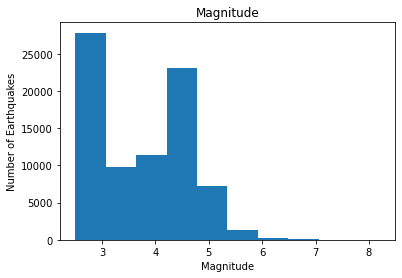

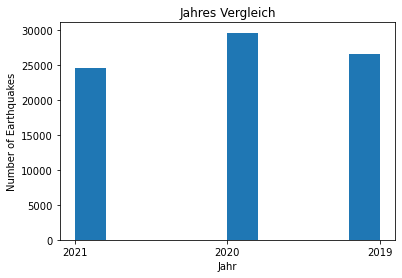

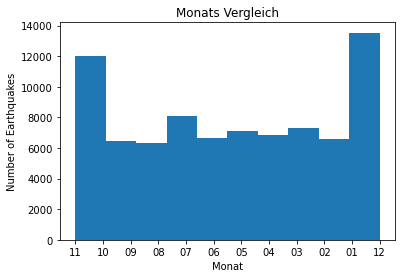

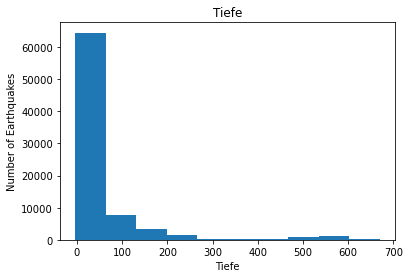

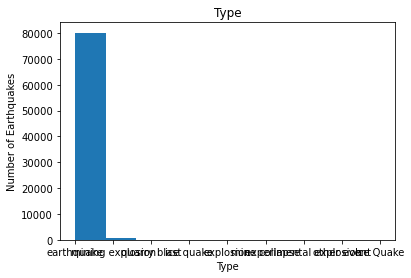

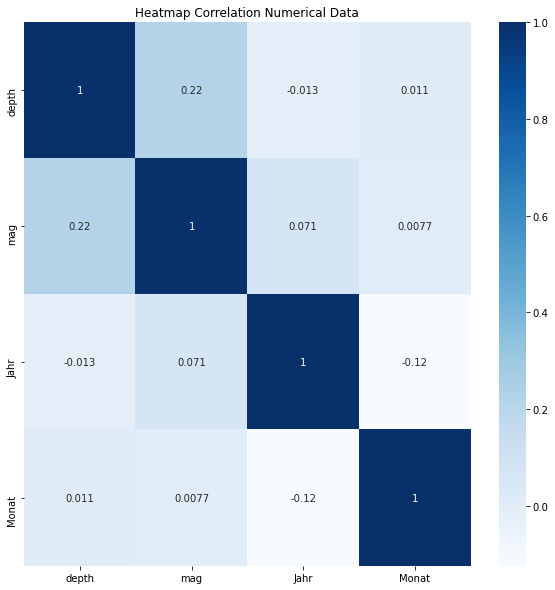

median value of mag: 4.0
median value of depth in km: 11.61
mean value of mag: 4.0
mean value of depth in km: 11.61
percentiles of depth 2.5, 25, 50, 75, 97.5 [  2.08   10.     11.61   45.52  513.741]
percentiles of mag 2.5, 25, 50, 75, 97.5 [2.5  2.85 4.   4.5  5.3 ]
Varianz und Std Tiefe
11668.061496049337 11668.061496049337
108.01880158587826
Varianz und Std Mag
0.7856662029943641 0.7856662029943641
0.8863781377010401
Region
 Fiji                             560.058964
Fiji region                       554.592901
Vanuatu region                    542.695484
Java Sea                          533.760000
Celebes Sea                       518.445556
                                     ...    
90km SE of Maneadero, B.C., MX      0.390000
 Minnesota                          0.000000
 MT                                 0.000000
Minnesota                           0.000000
Eastern Montana                     0.000000
Name: depth, Length: 712, dtype: float64
Region
2019 Ridgecrest Earthquak

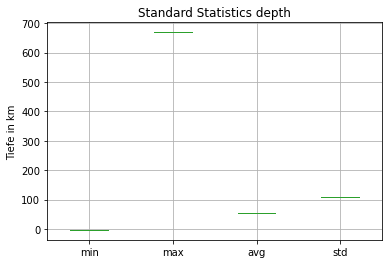

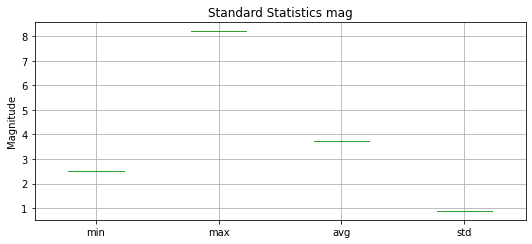

In [12]:
# Performing EDA 
# Aufgabe 1.1 a
#Print different Bee Swarm strength to depth/Region/type/Jahr/Monat nicht möglich, Rechenzeit zu lang
#Es wird Versuch über andere Diagramm Arten die Daten zu visualisieren
#max = sns.swarmplot(x="Jahr", y="mag", data=earthquakeChanged)

# Erstelle den Plot für mag
# Erstelle den Plot
_ = plt.hist(earthquakeChanged['mag'])


plt.title('Magnitude')
plt.xlabel('Magnitude')
plt.ylabel('Number of Earthquakes')

#Graphik zeigt die Verteilun der Erbebenstärke in BEzug auf die Menge der Erdbeben

# Zeige Plot an
plt.show()

# Kleine Erdbeben sind deutlich häufiger

# Erstelle den Plot
_ = plt.hist(earthquakeChanged['Jahr'])


plt.title('Jahres Vergleich')
plt.xlabel('Jahr')
plt.ylabel('Number of Earthquakes')

# Zeigt die Menge an Erdbeben pro Jahr

# Zeige Plot an
plt.show()

#Erdbeben im Jahr 2020 häufiger

# Erstelle den Plot
_ = plt.hist(earthquakeChanged['Monat'])


plt.title('Monats Vergleich')
plt.xlabel('Monat')
plt.ylabel('Number of Earthquakes')

# Zeigt die Menge an Erdbeben pro Monat

#Erdbeben an Ende des Jahres deutlich häufiger

# Zeige Plot an
plt.show()

# Erstelle den Plot
_ = plt.hist(earthquakeChanged['depth'])


plt.title('Tiefe')
plt.xlabel('Tiefe')
plt.ylabel('Number of Earthquakes')

#Anzahl der Erdbeben in BEzug auf die Tiefe

# Zeige Plot an
plt.show()

#Erdbeben selten in großer Tiefe

# Zeige Plot an
plt.show()

# Erstelle den Plot
_ = plt.hist(earthquakeChanged['type'])


plt.title('Type')
plt.xlabel('Type')
plt.ylabel('Number of Earthquakes')

#Wie häufig ist welcher Erdbeben-Typ

# Zeige Plot an
plt.show()
# Ein Type ist deutlich häufiger als die anderen, im Histogramm aber schlecht sichtbar

# Erstelle den Plot
#_ = plt.hist(earthquakeChanged['Region'])
#plt.title('Region')
#plt.xlabel('Region')
#plt.ylabel('Number of Earthquakes')
# Zeige Plot an
#plt.show()
#Nicht sinnvoll, da es zu viele verschiedene Locations gibt. Die möglichkeit des binnings von Data ist hier nicht sinnvoll, da es keine sinnvolle Möglichkeit gibt die Werte zu gruppieren ohne weitere Daten einzulesen

#Heatmap für Correlation
#Werte Numerisch machen
earthquakeChanged = earthquakeChanged.astype({"Monat": float, 'Jahr': float})
plt.figure(figsize=(10,10))
sns.heatmap(earthquakeChanged.corr(),cbar=True,annot=True,cmap='Blues')
plt.title('Heatmap Correlation Numerical Data')
plt.show()
#Zeigt die Korrelation zwischen den numerischen Werten

#Erste Analyse zeigt, das Werte Jahr, Monat, Tiefe und Stärke nicht oder nur geringfügig Korrelieren

#distinct location Sources (Nur bedingt aussagekräftig)
#distinctLocationSource = []
#for x in earthquakeChanged.Region:
#    if x not in distinctLocationSource:
#        distinctLocationSource.append(x)
#print(distinctLocationSource)

# An einigen Orten sind Erdbeben deutlich häufiger (Alaska, Puerto Rico, Ca, Indonesia, Philipines)

#Berrechnung median mag and depth
median_mag = statistics.median(earthquakeChanged['mag'])
print('median value of mag:', median_mag)

median_depth = statistics.median(earthquakeChanged['depth'])
print('median value of depth in km:', median_depth)

#Berrechnung mean mag and depth
mean_mag = np.mean(earthquakeChanged['mag'])
print('mean value of mag:', median_mag)

mean_depth = np.mean(earthquakeChanged['depth'])
print('mean value of depth in km:', median_depth)

#mean und median sind exakt gleich

#Berrechnung Percentile
np.sort(earthquakeChanged['depth'])
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_depth = np.percentile(earthquakeChanged['depth'], percentiles)
print('percentiles of depth 2.5, 25, 50, 75, 97.5',ptiles_depth)

np.sort(earthquakeChanged['mag'])
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_mag = np.percentile(earthquakeChanged['mag'], percentiles)
print('percentiles of mag 2.5, 25, 50, 75, 97.5',ptiles_mag)

# Variance and Standard Deviation
#Bringen in diesem Fall nur wenig

# Variance and Standard Deviation depth
print('Varianz und Std Tiefe')
# Array of differences to mean: differences
differences = earthquakeChanged['depth'] - np.mean(earthquakeChanged['depth'])

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance by its own
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(earthquakeChanged['depth'])

# Print the results
print(variance_explicit, variance_np)

#Standard Deviation is the square root of the variance

variance = np.var(earthquakeChanged['depth'])

# Print the square root of the variance
print(np.sqrt(variance))

# Variance and Standard Deviation mag

print('Varianz und Std Mag')
# Array of differences to mean: differences
differences = earthquakeChanged['mag'] - np.mean(earthquakeChanged['mag'])

# Square the differences: diff_sq
diff_sq = differences**2

# Compute the mean square difference: variance by its own
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(earthquakeChanged['mag'])

# Print the results
print(variance_explicit, variance_np)

#Standard Deviation is the square root of the variance

variance = np.var(earthquakeChanged['mag'])

# Print the square root of the variance
print(np.sqrt(variance))

#Durchschnittliche Tiefe der Beben nach Region
print(earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()).sort_values(ascending=False))
#Durchschnittliche Stärke der Beben nach Region
print(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()).sort_values(ascending=False))
# Es gibt sehr viele Unterschiedliche Orte, an denen ein Erdbeben auftritt) 
print(earthquakeChanged['Region'].value_counts()) 

#Boxplot depth
plt.title('Standard Statistics depth')
plt.ylabel('Tiefe in km')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
data = earthquakeChanged['depth']
min = data.min(0)
max = data.max(0)
avg = data.mean(0)
std = data.std(0)
df = pd.DataFrame(dict(min=min, max=max, avg=avg, std=std), index=[0])
df.boxplot()
plt.show()

#zeigt Grundsätzliche Statistiken für die Tiefe

#Boxplot mag
plt.title('Standard Statistics mag')
plt.ylabel('Magnitude')
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
data = earthquakeChanged['mag']
min = data.min(0)
max = data.max(0)
avg = data.mean(0)
std = data.std(0)
df = pd.DataFrame(dict(min=min, max=max, avg=avg, std=std), index=[0])
df.boxplot()
plt.show()
#zeigt Grundsätzliche Statistiken für die Magnitude

In [13]:
# Aufgabe 1.1 b
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for Depth and mag
print('Pearson Correlation')
r = pearson_r(earthquakeChanged['mag'], earthquakeChanged['depth'])

# Print the result
print(r)
print('Maß für den Grad des linearen Zusammenhangs. Pearson Correlation beider Variablen schwach positiv, wenn ein Wert sich erhöht dann erhäht sich der andere ebenfalls (selbes geht für decrease)')
print('It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship, Depth und Mag Korrelieren nur schwach')

Pearson Correlation
0.21871644519452996
Maß für den Grad des linearen Zusammenhangs. Pearson Correlation beider Variablen schwach positiv, wenn ein Wert sich erhöht dann erhäht sich der andere ebenfalls (selbes geht für decrease)
It gives information about the magnitude of the association, or correlation, as well as the direction of the relationship, Depth und Mag Korrelieren nur schwach


In [14]:
#Brauche ich später

#Durchschnittliche Tiefe der Beben nach Region unsortiert
print(earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()))
#Durchschnittliche Stärke der Beben nach Region unsortiert
print(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()))
# Es gibt sehr viele Unterschiedliche Orte, an denen ein Erdbeben auftritt)
# Stellt Min und Maxwerte dar für Stärke auf jede Region bezogen
print(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().min()))
print(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().max()))
# Stellt Min und Maxwerte dar für Tiefe auf jede Region bezogen
print(earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().min()))
print(earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().max()))

#nur schlecht visualisierbar, aufgrund der vielzahl von Daten wird das ganze nicht Übersichtlich

Region
 AK                                43.811087
 Afghanistan                      156.345377
 Alabama                            6.033333
 Alaska                            61.498409
 Albania                           16.096364
                                     ...    
west of Macquarie Island           10.000000
west of the Galapagos Islands      10.000000
western Indian-Antarctic Ridge     10.000000
western Texas                       6.440219
western Xizang                     18.588333
Name: depth, Length: 712, dtype: float64
Region
 AK                               3.280000
 Afghanistan                      4.684211
 Alabama                          2.795556
 Alaska                           4.082500
 Albania                          4.615000
                                    ...   
west of Macquarie Island          4.905882
west of the Galapagos Islands     4.500000
western Indian-Antarctic Ridge    4.982353
western Texas                     2.925000
western Xizang      

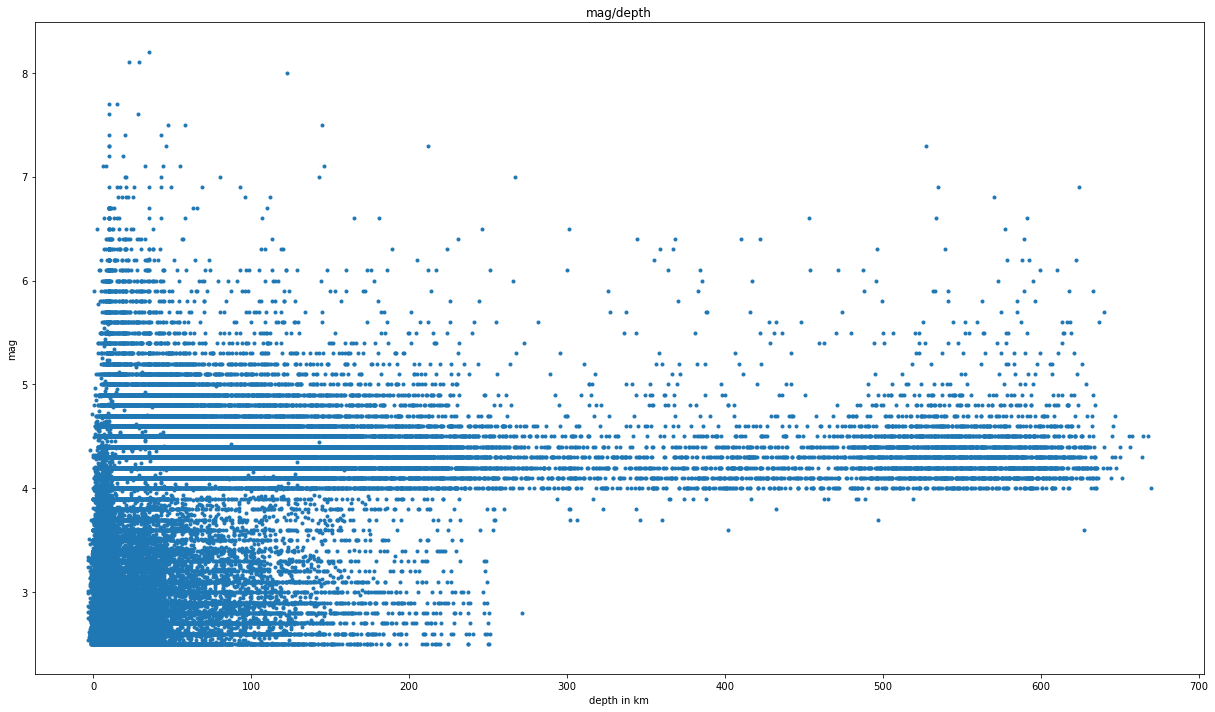

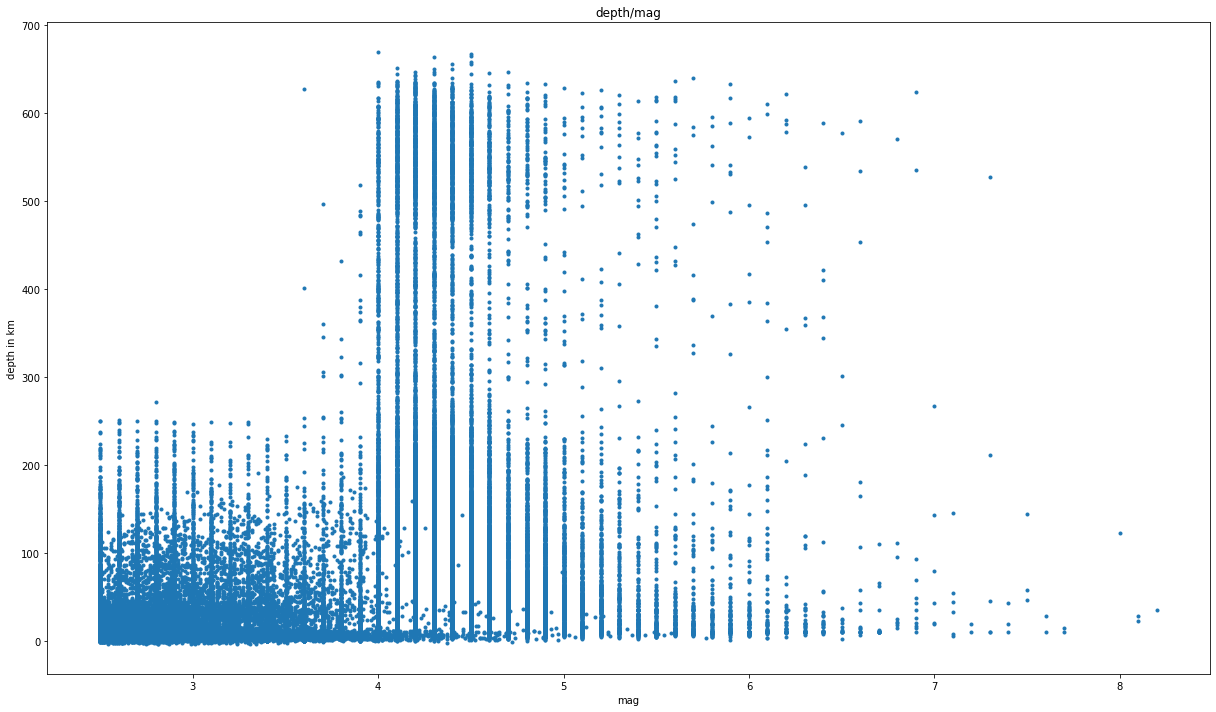

lineare Regression mag/depth 
0.001795 x + 3.644


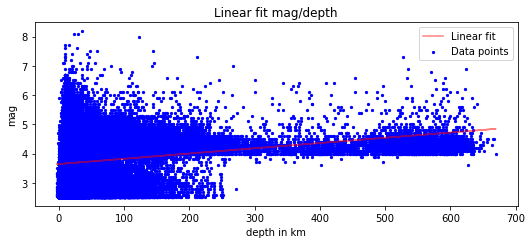

lineare Regression depth/mag 
26.65 x - 44.24


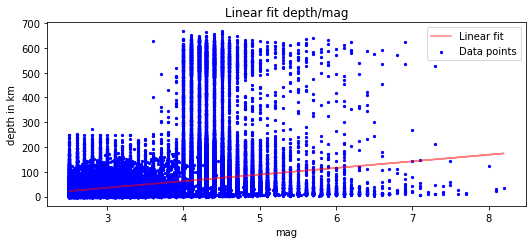

Unit of the Linear Fit for depth/mag: km
Unit of the Linear Fit for mag/depth: 1/km
Magnitude oder die Stärke von Erdbeben ist auf der Richterskala ohne Einheit


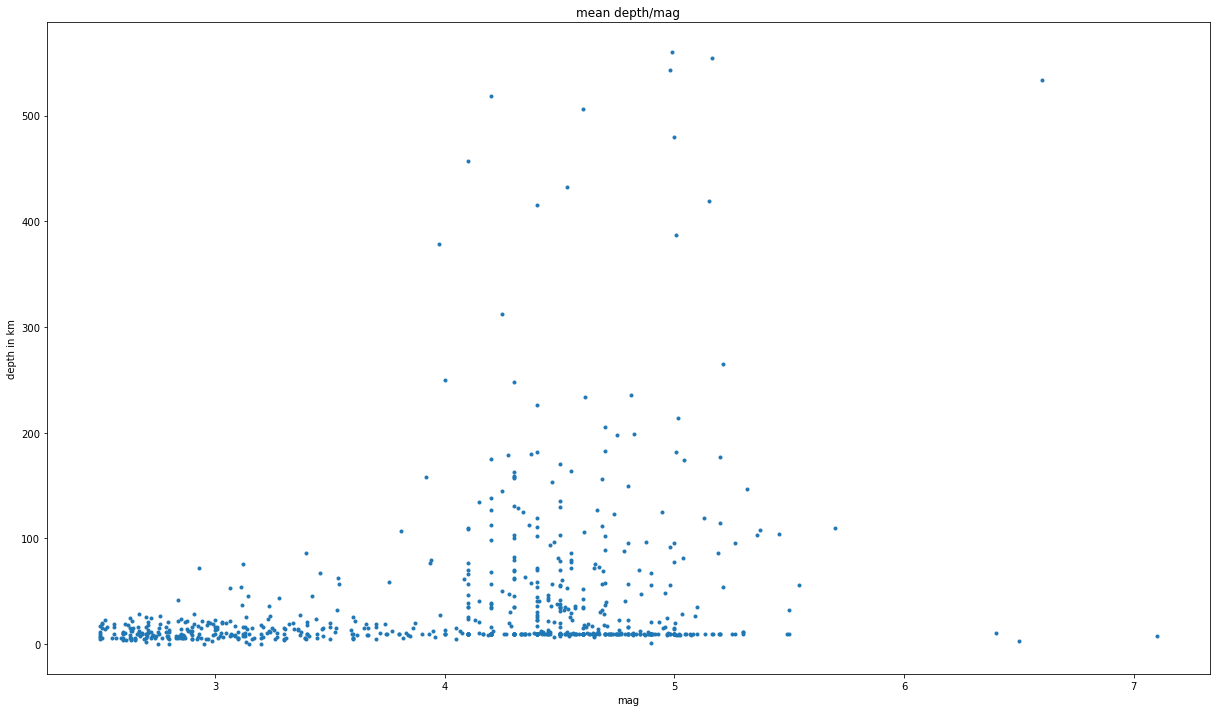

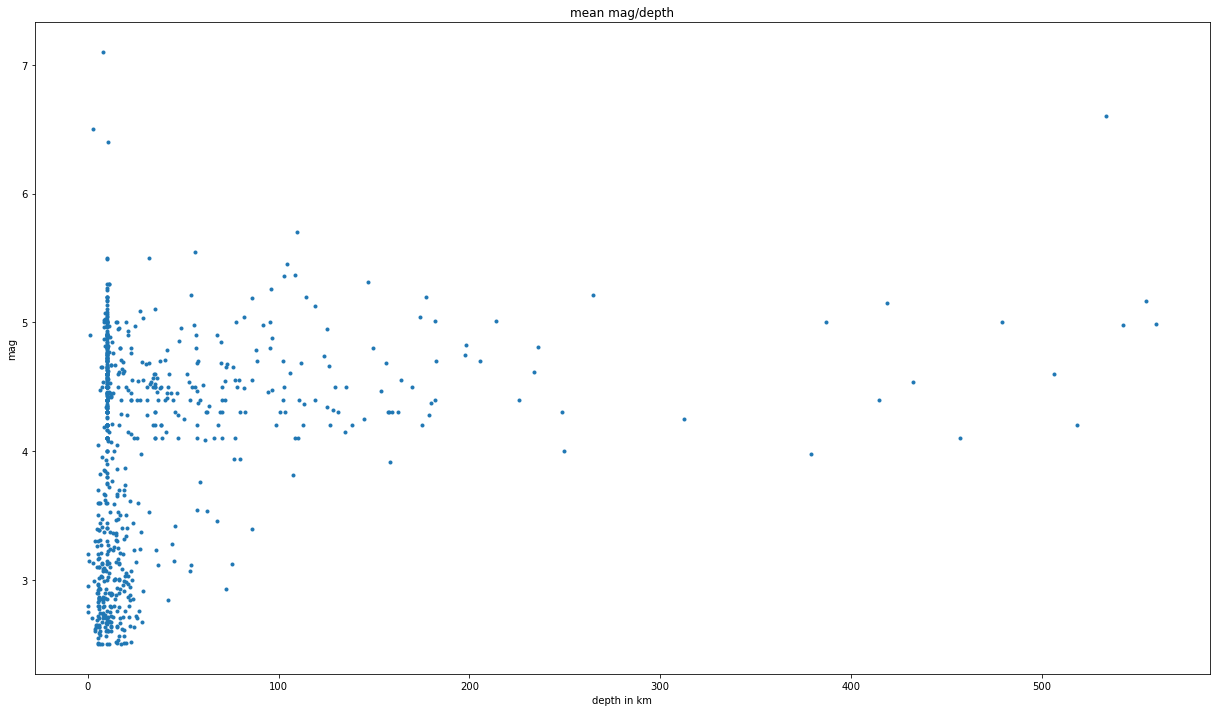

lineare Regression depth/mag 
23.85 x - 55.41


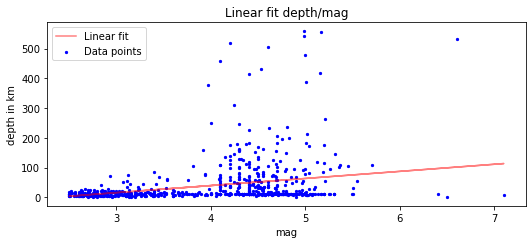

lineare Regression mag/depth 
0.00304 x + 3.892


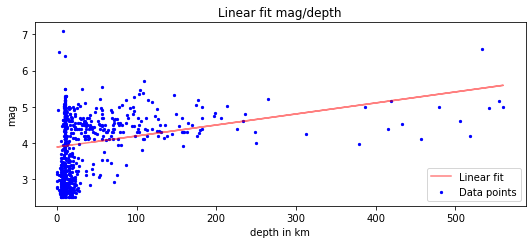

In [30]:
# Aufgabe 1.2 a/b
#mag/depth scatterplot
y = earthquakeChanged['mag']
x = earthquakeChanged['depth']

plt.figure(figsize=(17,10))
plt.title('mag/depth')
plt.xlabel('depth in km')
plt.ylabel('mag')
plt.plot(x, y, '.');
plt.show()

#depth/mag scatterplot
x = earthquakeChanged['mag']
y = earthquakeChanged['depth']


plt.figure(figsize=(17,10))
plt.title('depth/mag')
plt.xlabel('mag')
plt.ylabel('depth in km')
plt.plot(x, y, '.');
plt.show()




#Polyfit für mean Diagramme

#---LINEAR FIT----
#lineare Regression mag/depth
#generate the x array
x = earthquakeChanged['depth']


y = earthquakeChanged['mag']
#Applying a linear fit with .polyfit()
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  #obtaining the y axis values for the fitting function

##lineare Regression depth/mag Gleichung ausgeben
mdf=np.poly1d(fit)
print('lineare Regression mag/depth' + str(mdf))
#Plotting the data

fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit mag/depth')
plt.xlabel('depth in km')
plt.ylabel('mag')
ax.legend()
plt.show()


#---LINEAR FIT----
#lineare Regression depth/mag
#generate the x array
x = earthquakeChanged['mag']


y = earthquakeChanged['depth']
#Applying a linear fit with .polyfit()
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  #obtaining the y axis values for the fitting function
##lineare Regression depth/mag Gleichung ausgeben
dmf=np.poly1d(fit)
print('lineare Regression depth/mag' + str(dmf))
#Plotting the data

fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit depth/mag')
plt.ylabel('depth in km')
plt.xlabel('mag')
ax.legend()
plt.show()

print('Unit of the Linear Fit for depth/mag: km')

print('Unit of the Linear Fit for mag/depth: 1/km')

print('Magnitude oder die Stärke von Erdbeben ist auf der Richterskala ohne Einheit')

#Mean mag/depth Diagramm

y = earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean())
x = earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())

plt.figure(figsize=(17,10))
plt.title('mean depth/mag')
plt.ylabel('depth in km')
plt.xlabel('mag')
plt.plot(x, y, '.')
plt.show()
#Mean depth/mag Diagramm

x = earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean())
y = earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())

plt.figure(figsize=(17,10))
plt.title('mean mag/depth')
plt.ylabel('mag')
plt.xlabel('depth in km')
plt.plot(x, y, '.')
plt.show()


#---LINEAR FIT----
#lineare Regression mag/depth 
#generate the x array
y = earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean())


x = earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())
#Applying a linear fit with .polyfit()
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  #obtaining the y axis values for the fitting function
##lineare Regression depth/mag Gleichung ausgeben
f=np.poly1d(fit)
print('lineare Regression depth/mag' + str(f))
#Plotting the data

fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit depth/mag')
plt.xlabel('mag')
plt.ylabel('depth in km')
ax.legend()
plt.show()


#---LINEAR FIT----
#lineare Regression depth/mag unsortiert
#generate the x array
y = earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())


x = earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean())
#Applying a linear fit with .polyfit()
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept  #obtaining the y axis values for the fitting function
##lineare Regression depth/mag Gleichung ausgeben
f=np.poly1d(fit)
print('lineare Regression mag/depth' + str(f))
#Plotting the data

fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit mag/depth')
plt.ylabel('mag')
plt.xlabel('depth in km')
ax.legend()
plt.show()

### Auch wenn die Sortierten Graphilen mit der linearen Regression die schönsten Werte liefer
### sind die Verknüpfungen die hier gezogen Werten Falsch.

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
Map out the conceptual data model and explain why you chosen that model

Bei dieser Aufgabe gibt es kein wirkliches Data Model, es wurden lediglich CSV Dateien eingelesen

#### 3.2 Hypothesis Tests
provide needed statistiks with explonation and answer to your business questions for the analysis

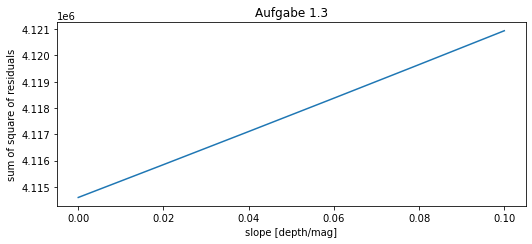

Minimal gegen 0


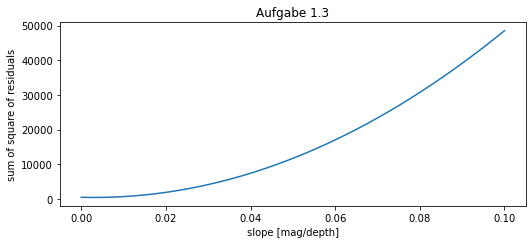

Minimal gegen 0
rss und lineare regression unterschieden sich, Daten sind nicht normalverteilt
SEM
0.03152727591859673
bs_std
0.031933988047272294


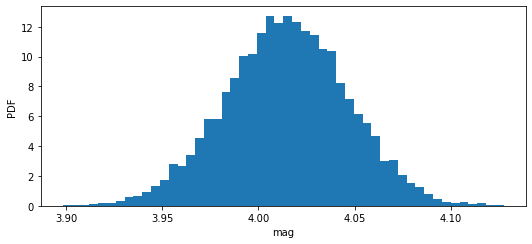

95% confidence interval = [3.95150924 4.07581049] mag


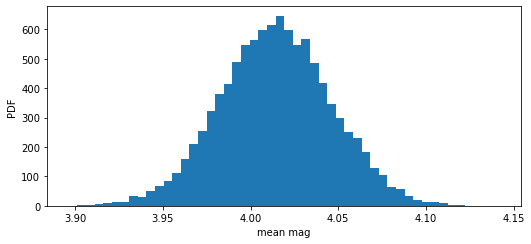

SEM
2.7923892093253726
bs_std
2.812313809474732


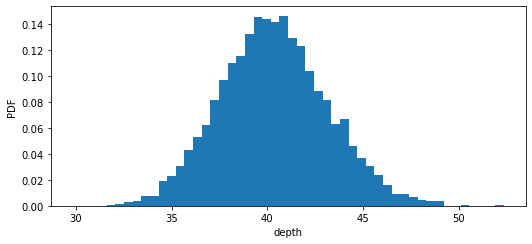

95% confidence interval = [35.10620629 46.06169688] depth


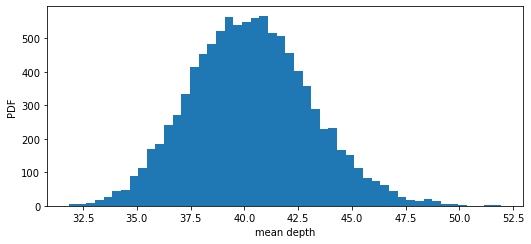

In [16]:
# Conceptual Data Model
# Aufgabe 1.3 a

#lineare regression mean depth/mag
#23.85x-55.41
#a=23.85
b=55.41

earthquakeChanged = earthquakeChanged.astype({"mag": float, 'depth': float})

N=200
a_vals=np.linspace(0, 0.1, N, endpoint=True)
rss=np.empty_like(a_vals)
for i,a in enumerate(a_vals):
    rss[i]=np.sum((earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean())-a*earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())-b)**2)
plt.title('Aufgabe 1.3')
plt.plot(a_vals, rss, "-")
plt.xlabel("slope [depth/mag]")
plt.ylabel('sum of square of residuals')
plt.show()
print('Minimal gegen 0')
#lineare regression mean mag/depth

#0.00304x + 3.892

b=3.892
earthquakeChanged = earthquakeChanged.astype({"mag": float, 'depth': float})

N=200
a_vals=np.linspace(0, 0.1, N, endpoint=True)
rss=np.empty_like(a_vals)
for i,a in enumerate(a_vals):
    rss[i]=np.sum((earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())-a*earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean())-b)**2)
plt.title('Aufgabe 1.3')
plt.plot(a_vals, rss, "-")
plt.xlabel("slope [mag/depth]")
plt.ylabel('sum of square of residuals')
plt.show()
print('Minimal gegen 0')
print('rss und lineare regression unterschieden sich, Daten sind nicht normalverteilt')

# Aufgabe 1.4 a



def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

#For mag
#Bootstrap replicates of the mean and the SEM ( standard error of the mean )

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()), np.mean, size=10000)

# Compute and print SEM
sem = np.std(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())) / np.sqrt(len(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())))
print('SEM')
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('bs_std')
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('mag')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()), np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'mag')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean mag')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


#For depth
#Bootstrap replicates of the mean and the SEM ( standard error of the mean )

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()), np.mean, size=10000)

# Compute and print SEM
sem = np.std(earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean())) / np.sqrt(len(earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean())))
print('SEM')
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('bs_std')
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('depth')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()), np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'depth')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean depth')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()




95% CI for slope
[16.86041838 31.31154528]


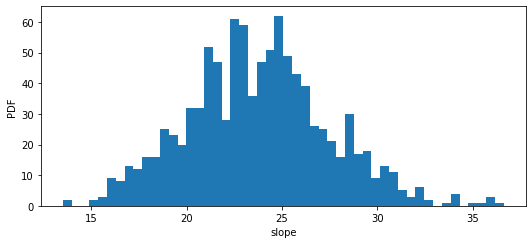

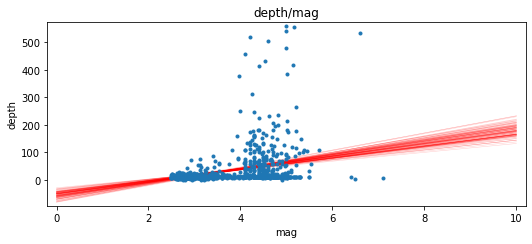

95% CI for slope
[0.00239825 0.0039132 ]


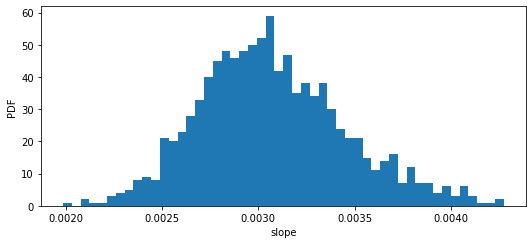

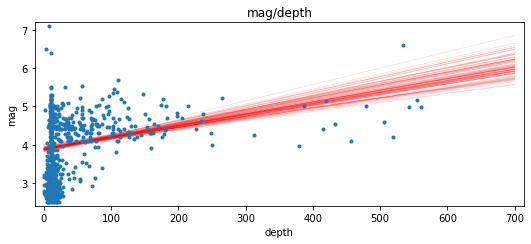

In [17]:
# Aufgabe 1.5 a


def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# Generate replicates of slope and intercept using pairs bootstrap for depth/mag
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                     earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()),  earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()), size=1000)

# Compute and print 95% CI for slope
print('95% CI for slope')
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 10])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot( earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()),  earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()), marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('mag')
_ = plt.ylabel('depth')
plt.title('depth/mag')
plt.margins(0.02)
plt.show()

# Generate replicates of slope and intercept using pairs bootstrap for mag/depth
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(
                     earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()),  earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()), size=1000)

# Compute and print 95% CI for slope
print('95% CI for slope')
print(np.percentile(bs_slope_reps, [2.5, 97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

# Generate array of x-values for bootstrap lines: x
x = np.array([0, 700])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i] * x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot( earthquakeChanged.groupby(['Region'])['depth'].agg(lambda x: x.unique().mean()),  earthquakeChanged.groupby(['Region'])['mag'].agg(lambda x: x.unique().mean()), marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('depth')
_ = plt.ylabel('mag')
plt.title('mag/depth')
plt.margins(0.02)
plt.show()

Pearson Correlation
0.21871644519452996
Positive Pearson Correlation deutet darauf hin, das beide Werte voneinander abhängen. Weitere Tests wie z.B. Chi Quadrat machen an dieser Stelle keinen sinn, da die Daten nicht nominal sinnd, sich also nicht sinnvoll und zur Hypothese passen in Gruppen einteilen lassen.
Durch den Pearson Coeefizient wird die Gegenhypothese abgelehnt und es wird angenommen, das Tiefe eines Beben und Stärke voneinander abhängig sind


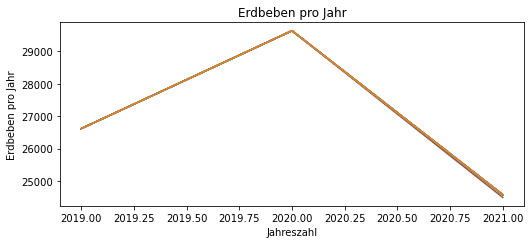

Es kann mit den vorhandenen Daten kein klarer Trend ausgemacht werden. Weder die Hypothese noch die Gegenhypothese können klar wiederlegt oder bestätigt werden.
Anteil der Kleinen Beben an der gesamtzahl der Beben
time       93.929009
depth      93.929009
mag        93.929009
magType    93.928934
id         93.929009
place      93.941120
type       93.929009
Region     93.929009
Jahr       93.929009
Monat      93.929009
Tag        93.929009
Total      93.929009
dtype: float64
 Alaska                                               13939
 Puerto Rico                                           9944
 CA                                                    5912
 Indonesia                                             4640
 Philippines                                           2113
                                                      ...  
82 km NE of Laikit, Laikit II (Dimembe), Indonesia        1
 Belgium                                                  1
88km SSE of Estacion Coahuila, B.C., MX

In [18]:
# Hypothesis Test
# Aufgabe 1.6 a
# Hypothese 1:Tiefe und Stärke hängen voneinander ab
# Gegenhypothese: Tiefe und Stärke hängen nicht voneinander ab
print('Pearson Correlation')
r = pearson_r(earthquakeChanged['mag'], earthquakeChanged['depth'])
# Print the result
print(r)
print('Positive Pearson Correlation deutet darauf hin, das beide Werte voneinander abhängen. Weitere Tests wie z.B. Chi Quadrat machen an dieser Stelle keinen sinn, da die Daten nicht nominal sinnd, sich also nicht sinnvoll und zur Hypothese passen in Gruppen einteilen lassen.')
print('Durch den Pearson Coeefizient wird die Gegenhypothese abgelehnt und es wird angenommen, das Tiefe eines Beben und Stärke voneinander abhängig sind')

#Falls ein Chi-Quadrat Test später nötig sein sollte
#erthquakeChi muss vor diesem Test noch weiter bereinigt werden (negative Werte löschen)
#print("In order to test this hypothesis, we will use a Chi-Square test to proof or counter it")
#newdf = earthquakeChi

#to_drop = ['time', 'latitude', 'longitude', 'magType', 'nst', 'gap', 'dmin', 'rms', 'magError', 'magNst', 'status', 'locationSource', 'magSource', 'Region', 'Jahr', 'Monat', 'Tag', 'Total']
#newdf.drop(to_drop, inplace=True, axis=1)

#to_drop = ['net', 'id', 'updated', 'place', 'type', 'horizontalError', 'depthError']
#newdf.drop(to_drop, inplace=True, axis=1)
#print(newdf.head())
#stat, p, dof, expected = chi2_contingency(newdf)
#print(p)
#print(dof)
# interpret test-statistic
#prob = 0.95
#critical = stats.chi2.ppf(prob, dof)
#if abs(stat) >= critical:
#    print('Dependent (reject H0)')
#else:
#    print('Independent (fail to reject H0)')


# interpret p-value
#alpha = 1.0 - prob
#if p <= alpha:
#    print('Dependent (reject H0)')
#else:
#    print('Independent (fail to reject H0)')

#print("The test results show us, that the variables are independet from one another")



# Hypthese 2: Die Zahl der Erdbeben nimmt von Jahr zu Jahr zu
#Gegenhypothese: Die Zahl der Erbeben bleibt gleich oder nimmt ab
#Aufteilen des Dateframes
erthquake2019= earthquakeChanged[earthquakeChanged['Jahr'] == 2019]
erthquake2019C=erthquake2019.count()
erthquake2020= earthquakeChanged[earthquakeChanged['Jahr'] == 2020]
erthquake2020C=erthquake2020.count()
erthquake2021= earthquakeChanged[earthquakeChanged['Jahr'] == 2021]
erthquake2021C=erthquake2021.count()
y=[erthquake2019C, erthquake2020C, erthquake2021C]
x=[2019, 2020, 2021]

plt.plot(x,y)
plt.title('Erdbeben pro Jahr')
plt.xlabel('Jahreszahl')
plt.ylabel('Erdbeben pro Jahr')
plt.show()

print('Es kann mit den vorhandenen Daten kein klarer Trend ausgemacht werden. Weder die Hypothese noch die Gegenhypothese können klar wiederlegt oder bestätigt werden.')

# Hypothese 3:Es gibt Orte, an denen sich Erdbeben bestimmter stärke häufen am Beispiel Alaska
# Gegenhypothese: Es kommt zu keiner Häufung der Erdbeben bestimmter stärke an einem Ort am Beispiel Alaska


earthquakeklein= earthquakeChanged[earthquakeChanged['mag'] < 5]
#Anteil kleiner Erdbeben
p=earthquakeklein.count()/earthquakeChanged.count()*100
print('Anteil der Kleinen Beben an der gesamtzahl der Beben')

print(p)

earthquakeChanged = earthquakeChanged.astype({"Region": str})

#Berrechne p für Alaska
print(earthquakeChanged['Region'].value_counts())
#Daraus folgt, Alaska hatte 13939 Erdbeben zu verzeichnen
ErbebenAlaska=13939
print(earthquakeklein['Region'].value_counts())
#Daraus folgt, Alaska hatte 13805 kleine Erdbeben zu verzeichnen
ErbebenAlaskaKlein=13805
pAlaska=ErbebenAlaskaKlein/ErbebenAlaska*100

print('Anteil der Kleinen Beben an der gesamtzahl der Beben in Alaska')

print(pAlaska)

print('Daraus lässt sich schließen, das kleine Erdbeben in Alaska öfter vorkommen als im Durchschnitt. Somit wird die Gegenhypothese abgelehnt und Hypothese 3 gilt')
# Hypothes4: Wenn es ein Erdbeben gibt gibt es im gleichen Jahr ein weiteres Erdbeben
# Ggegnhypothes: Erdbeben kommen nicht nochmal am selben Ort vor

print(earthquakeChanged.groupby(['Region', 'Jahr']).size())
print('Ergebnise diese Gropu By zeigen eindeutig das es vorkommt, das es im selben Jahr mehrere Erdbeben gibt, Gegenhypothese wird abgelehnt')




In [19]:
# Aufgabe 1.7 
#Provide the conclusion of your earthquake research.
# Will be done here Step 4: Show your solution: the Model of Data and any conclutions
#Is it possible to perfume here A/B Test? What it can show? What confidence intervals and p-values show us in regard to testing of Null-hypothesis?

#Es ist nicht möglich oder sinnvoll, A/B TEsts hier durchzuführen. A/B testing is a basic randomized control experiment. It is a way to compare the two versions of a variable to find out which performs better in a controlled environment.
# Bei Erdbeben handelt es sich um natürliche geschehen die nicht in kontrollierbare Umgebung auftreten. Es kann als nicht nur eine Variable verändert werden um zu beobachten, was passiert. Dies geht weder bei den hier verwendetetn Daten noch bei den eigentlich sehr viel komplexeren Daten in der Natur und ist auch nicht sinnvoll

#Die Hypothesen werden nicht über die p-Values getestet in meinem Fall, deshalb gibt es auch hierzu keine Aussage


# Aufgabe 1.8

#In sum, the Bonferroni correction method is a simple way of controlling the Type I error rate in hypothesis testing. 
#To calculate the new alpha level, simply divide the original alpha by the number of comparisons being made. However, 
#since this approach is rather strict, it may be more appropriate to use alternative means of controlling for multiple 
#comparisons.

#Type I error, in the context of hypothesis testing, is the likelihood of discovering a false-positive result, 
#thus rejecting a true null hypothesis

#Der p-Wert (nach R. A. Fisher), auch Überschreitungswahrscheinlichkeit oder Signifikanzwert genannt 
#(p für lateinisch probabilitas = Wahrscheinlichkeit), ist in der Statistik und dort insbesondere in der 
#Testtheorie ein Evidenzmaß für die Glaubwürdigkeit der Nullhypothese, die oft besagt, dass ein bestimmter Zusammenhang 
#nicht besteht, z. B. ein neues Medikament nicht wirksam ist.


#Was zeigt ein Bonferoni Test?
#Die Bonferroni-Korrektur kommt immer dann zum Einsatz, wenn du mehrere zusammenhängende Tests durchführst.
#Bei der Durchführung mehrerer statistischer Signifikanztests mit den gleichen Daten kann die Bonferroni-Korrektur angewandt 
#werden, um es einem einzelnen Test zu erschweren, statistisch signifikant zu sein.
#Es sollen falsch positive Ergebnisse/Tests verhindert werden bzw. deren Einwirkung auf das Gesamtergebnis soll minimiert werden.

RangeTest=10000
earthquakeChanged = earthquakeChanged.astype({"depth": float, 'mag': float})
DepthArray=earthquakeChanged['depth'].to_numpy()

MagArray=earthquakeChanged['mag'].to_numpy()

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(DepthArray, MagArray)

# Print the result
print('Pearson Correlation')
print(r)

# Compute observed correlation: r_obs
r_obs = pearson_r(DepthArray, MagArray)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(RangeTest)

# Draw replicates
for i in range(RangeTest):
    # Permute illiteracy measurments: illiteracy_permuted
    DepthArray_permuted = np.random.permutation(DepthArray)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(DepthArray_permuted, MagArray)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

#Bonferoni Test_
p_adjusted = multipletests(p, method='bonferroni')
print('Bonferoni',p_adjusted)
print('Die Hypothese, das die Tiefe und die Stärke Korrelieren wird trotz der positiven Pearson Correlation abgelehnt, da sowohl p-Value 0 als auch Rückgabe Bonferoni Korrektur = true (for hypothesis that can be rejected for given alpha.)')


earthquakeChanged = earthquakeChanged.astype({"depth": float, 'mag': float})
DepthArray=earthquakeChanged['depth'].to_numpy()

MagArray=earthquakeChanged['mag'].to_numpy()

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor
r = pearson_r(MagArray, DepthArray)

# Print the result
print('Pearson Correlation')
print(r)

# Compute observed correlation: r_obs
r_obs = pearson_r(MagArray, DepthArray)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(RangeTest)

# Draw replicates
for i in range(RangeTest):
    # Permute illiteracy measurments: illiteracy_permuted
    MagArray_permuted = np.random.permutation(MagArray)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(MagArray_permuted, DepthArray)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

#Bonferoni Test

p_adjusted = multipletests(p, method='bonferroni')
print('Bonferoni',p_adjusted)
print('Die Hypothese, das die Tiefe und die Stärke Korrelieren wird trotz der positiven Pearson Correlation abgelehnt, da sowohl p-Value 0 als auch Rückgabe Bonferoni Korrektur = true (for hypothesis that can be rejected for given alpha.)')

Pearson Correlation
0.21871644519452996
p-val = 0.0
Bonferoni (array([ True]), array([0.]), 0.050000000000000044, 0.05)
Die Hypothese, das die Tiefe und die Stärke Korrelieren wird trotz der positiven Pearson Correlation abgelehnt, da sowohl p-Value 0 als auch Rückgabe Bonferoni Korrektur = true (for hypothesis that can be rejected for given alpha.)
Pearson Correlation
0.21871644519452996
p-val = 0.0
Bonferoni (array([ True]), array([0.]), 0.050000000000000044, 0.05)
Die Hypothese, das die Tiefe und die Stärke Korrelieren wird trotz der positiven Pearson Correlation abgelehnt, da sowohl p-Value 0 als auch Rückgabe Bonferoni Korrektur = true (for hypothesis that can be rejected for given alpha.)


### Step 4: Show your solution: the Model of  Data and any conclutions 
#### 4.1 Create graphics, any needed queris to visualise your solution


- how likely it's that in places where there have already been earthquakes there will be more earthquakes? What would be the trend in 10 years?
- Whether there are special places where earthquakes occur certain strength piling.
- A correlation between values such as depth and strength (or other values related to strength)

Es wird als gegeben angesehen das Erdbeben innerhaln eines Jahr an einem Ort öfter vorkommen. Dies wird durch diese Auflistung verdeutlicht, in der an mehreren Orten mehrere Erdbeben im gleichen Jahr vorkommen
Region          Jahr  
 AK             2019.0     15
                2020.0     31
                2021.0      7
 Afghanistan    2019.0    149
                2020.0    151
                         ... 
western Texas   2020.0      7
                2021.0     10
western Xizang  2019.0     10
                2020.0     22
                2021.0      9
Length: 1318, dtype: int64
              Region    Jahr  counts
0                 AK  2019.0      15
1                 AK  2020.0      31
2                 AK  2021.0       7
3        Afghanistan  2019.0     149
4        Afghanistan  2020.0     151
...              ...     ...     ...
1313   western Texas  2020.0       7
1314   western Texas  2021.0      10
1315  western Xizang  2019.0      10
1316  western Xizang  2020.0      22
131

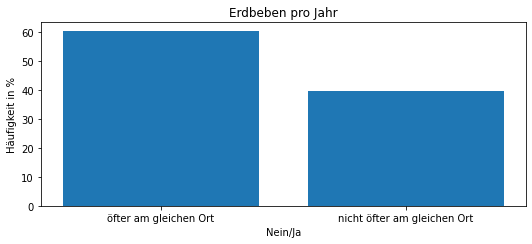

Wie die Graphik zeigt, ist ein Trend nicht feststellbar, weder in den letzten Jahren noch für die Zukunft. HIerfür wären mehr Daten aus den Jahren 2018 und dabor nötig


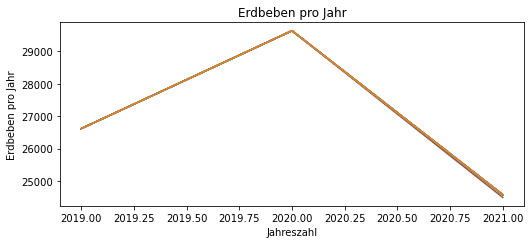

Wie das Beispiel Alaska zeigt gibt es Orte, an denen eingie Erdbeben in Bezug auf dei Stärke häufiger sind als im Durchscnitt. Verdeutlicht wird dies durch die folgenden Auflistungen.
Anteil der Kleinen Beben an der gesamtzahl der Beben
time       93.929009
depth      93.929009
mag        93.929009
magType    93.928934
id         93.929009
place      93.941120
type       93.929009
Region     93.929009
Jahr       93.929009
Monat      93.929009
Tag        93.929009
Total      93.929009
dtype: float64
 Alaska                                               13939
 Puerto Rico                                           9944
 CA                                                    5912
 Indonesia                                             4640
 Philippines                                           2113
                                                      ...  
82 km NE of Laikit, Laikit II (Dimembe), Indonesia        1
 Belgium                                                  1
88km SSE of Esta

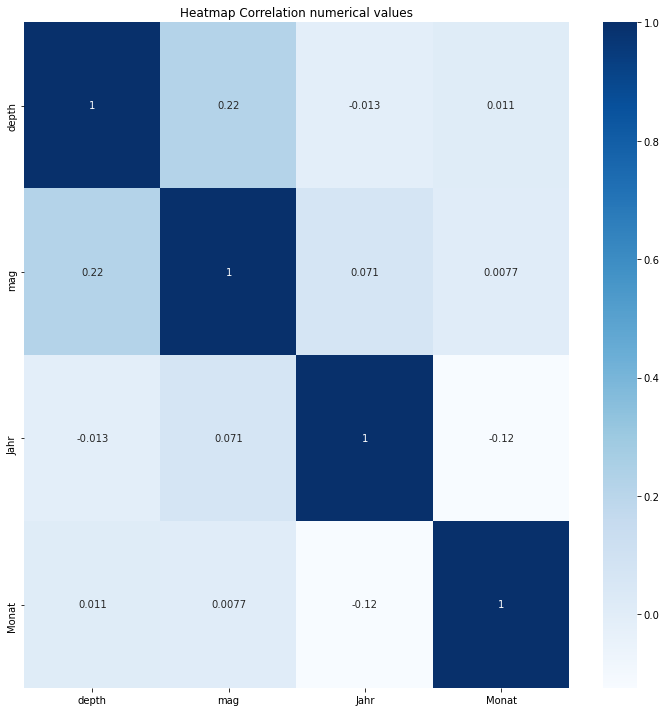

Pearson Correlation
Die p-Values wiederlegen allerdings diese Aussage und zeigen, das es keine Correlation gibt
p-val = 0.0


In [20]:
#how likely it's that in places where there have already been earthquakes there will be more earthquakes? What would be the trend in 10 years?

print('Es wird als gegeben angesehen das Erdbeben innerhaln eines Jahr an einem Ort öfter vorkommen. Dies wird durch diese Auflistung verdeutlicht, in der an mehreren Orten mehrere Erdbeben im gleichen Jahr vorkommen')
print(earthquakeChanged.groupby(['Region', 'Jahr']).size())

#In ein Dataframe umwandeln
earthquakeDataframe=earthquakeChanged.groupby(['Region', 'Jahr']).size().reset_index(name='counts')

print(earthquakeDataframe)

#Häufigkeit der Erdbeben über 1

earthquakeDataframe1=earthquakeDataframe.loc[earthquakeDataframe['counts']>1]

print(earthquakeDataframe1)
#Vergleich der größe der Dataframe

size1=earthquakeDataframe1.size
size=earthquakeDataframe.size

if(size==size1):
    print('In 100% der Fälle traten Erdbeben nicht vereinzelt auf')
else:
    Häufigkeit=size1/size*100
    Häufigkeit=round(Häufigkeit,2)
    print('In',Häufigkeit,'  der Fälle traten Erdbeben nicht vereinzelt auf')
    HäufigkeitNicht= (size-size1)/size*100
    HäufigkeitNicht=round(HäufigkeitNicht,2)
    print('In',HäufigkeitNicht,'  der Fälle traten Erdbeben vereinzelt auf')

y=[Häufigkeit, HäufigkeitNicht]
x=['öfter am gleichen Ort', 'nicht öfter am gleichen Ort']



print('Treten Erdbeben vereinzelt auf?')
plt.bar(x,y)
plt.title('Erdbeben pro Jahr')
plt.xlabel('Nein/Ja')
plt.ylabel('Häufigkeit in %')
plt.show() 

    
print('Wie die Graphik zeigt, ist ein Trend nicht feststellbar, weder in den letzten Jahren noch für die Zukunft. HIerfür wären mehr Daten aus den Jahren 2018 und dabor nötig')
erthquake2019= earthquakeChanged[earthquakeChanged['Jahr'] == 2019]
erthquake2019C=erthquake2019.count()
erthquake2020= earthquakeChanged[earthquakeChanged['Jahr'] == 2020]
erthquake2020C=erthquake2020.count()
erthquake2021= earthquakeChanged[earthquakeChanged['Jahr'] == 2021]
erthquake2021C=erthquake2021.count()
y=[erthquake2019C, erthquake2020C, erthquake2021C]
x=[2019, 2020, 2021]

plt.plot(x,y)
plt.title('Erdbeben pro Jahr')
plt.xlabel('Jahreszahl')
plt.ylabel('Erdbeben pro Jahr')
plt.show()  

#Whether there are special places where earthquakes occur certain strength piling.
print('Wie das Beispiel Alaska zeigt gibt es Orte, an denen eingie Erdbeben in Bezug auf dei Stärke häufiger sind als im Durchscnitt. Verdeutlicht wird dies durch die folgenden Auflistungen.')

earthquakeklein= earthquakeChanged[earthquakeChanged['mag'] < 5]
#Anteil kleiner Erdbeben
p=earthquakeklein.count()/earthquakeChanged.count()*100
print('Anteil der Kleinen Beben an der gesamtzahl der Beben')

print(p)

earthquakeChanged = earthquakeChanged.astype({"Region": str})

#Berrechne p für Alaska
print(earthquakeChanged['Region'].value_counts())
#Daraus folgt, Alaska hatte 13939 Erdbeben zu verzeichnen
ErbebenAlaska=13939
print(earthquakeklein['Region'].value_counts())
#Daraus folgt, Alaska hatte 13805 kleine Erdbeben zu verzeichnen
ErbebenAlaskaKlein=13805
pAlaska=ErbebenAlaskaKlein/ErbebenAlaska*100

print('Anteil der Kleinen Beben an der gesamtzahl der Beben in Alaska')

print(pAlaska)


#A correlation between values such as depth and strength (or other values related to strength)
print('Die Pearson Correlation zeigt, das es zwischen diesen Werten einen zusammenhang gibt. Zu sehen in dieser Heatmap und dem Pearson Coeffizient.')
plt.figure(figsize=(10,10))
plt.title('Heatmap Correlation numerical values')
sns.heatmap(earthquakeChanged.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()
print('Pearson Correlation')
r = pearson_r(earthquakeChanged['mag'], earthquakeChanged['depth'])
print('Die p-Values wiederlegen allerdings diese Aussage und zeigen, das es keine Correlation gibt')
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

#### 4.2 Data Quality Checks
Explain the data quality checks you'll perform to ensure the dataframes. These could include:
 * Integrity constraints on the relational database (e.g., unique key, data type, etc.)
 * Unit tests for the scripts to ensure they are doing the right thing
 * Source/Count checks to ensure completeness
 
Run Quality Checks

In [21]:
# Perform quality checks here
#Die oben gennanten Ansätze machen im Bezug auf diese Daten nur wenig sinn, daher werden hier einige eigene Ansätze vorgestellt

#Check ob CSV's gleiche Spalten haben
newlist1 = []
for col in earthquake1.columns:
     newlist1.append(col)

newlist2 = []
for col in earthquake2.columns:
     newlist2.append(col)
        
newlist3 = []
for col in earthquake3.columns:
     newlist3.append(col)

newlist4 = []
for col in earthquake4.columns:
     newlist4.append(col)        

newlist5 = []
for col in earthquake5.columns:
     newlist5.append(col)        
        
if(newlist1==newlist2):
    if(newlist2==newlist3):
        if(newlist3==newlist4):
            if(newlist4==newlist5):
                print('Die CSV haben den gleichen Header')
else:
    print('Header sind nicht gleich')
    
earthquakeBackup = earthquakeBackup.astype({"magError": float, 'magNst': float})
#Nutzen der Error Daten aus earthquakeBackup
#magError
meanmagError=np.mean(earthquakeBackup['magError'])
#Alles was über dem mittelwert +-50% Mittelwert liegt rausrechnen
meanmagErrorMinus=meanmagError-0.5*meanmagError
meanmagErrorPlus=meanmagError+0.5*meanmagError

earthquakemeanMag=earthquakeBackup.loc[earthquakeBackup['magError']<meanmagErrorPlus]
earthquakemeanMag=earthquakemeanMag.loc[earthquakemeanMag['magError']>meanmagErrorMinus]
CountBackup=earthquakeBackup.size
CountmeanMag=earthquakemeanMag.size

#Prozentuale angabe der gelöschten Daten
PGD=(CountBackup-CountmeanMag)/CountBackup *100
PGD=round(PGD, 2)
print('Gelöschte Daten in %:', PGD )


#Nutzen der Error Daten aus earthquakeBackup
#magNST
meanmagNST=np.mean(earthquakemeanMag['magNst'])
#Alles was über dem mittelwert +-50% Mittelwert liegt rausrechnen
meanmagNSTMinus=meanmagNST-0.5*meanmagNST
meanmagNSTPlus=meanmagNST+0.5*meanmagNST

earthquakemeanNST=earthquakemeanMag.loc[earthquakemeanMag['magNst']<meanmagNSTPlus]
earthquakemeanNST=earthquakemeanNST.loc[earthquakemeanNST['magNst']>meanmagNSTMinus]
CountBackup=earthquakeBackup.size
CountmeanNST=earthquakemeanNST.size

#Prozentuale angabe der gelöschten Daten
PGD=(CountBackup-CountmeanMag)/CountBackup *100
PGD=round(PGD, 2)
print('Es sollten:', PGD, '% Daten nur gesondert berücksichtigt werden' )
#In dieser Arbeit wurden alle DAten berücksichtig


#Tiefen kleiner 0 (liegen in der Luft) nicht berücksichtigen
earthquakeChangedDepth=earthquakeChanged.loc[earthquakeChanged['depth']<0]
positiveTiefe=earthquakeChangedDepth.size
print(positiveTiefe, ' Daten sollten nicht berücksichtigt werden')

#Weitere Möglichkeiten wäre das normalisieren von Daten(z.B. der Region) und das gezielte umwandeln von Datentypen um die Konsistenz der Werte zu überprüfen

# check if data missing
missing = earthquakeChanged.isnull().sum()
print(missing)
print("magType ist für die Analyse von untergeordneter Bedeutung")
print("Die Fehlenden Daten bei Place werden in der Aufteilung des Place beretis berücksichtigt")

Die CSV haben den gleichen Header
Gelöschte Daten in %: 41.32
Es sollten: 41.32 % Daten nur gesondert berücksichtigt werden
2556  Daten sollten nicht berücksichtigt werden
time        0
depth       0
mag         0
magType     1
id          0
place      86
type        0
Region      0
Jahr        0
Monat       0
Tag         0
Total       0
dtype: int64
magType ist für die Analyse von untergeordneter Bedeutung
Die Fehlenden Daten bei Place werden in der Aufteilung des Place beretis berücksichtigt


#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies, algorithms, methodes for the project.
* Propose how often the data should be updated and why. What tools you are used for data simulation in case if it is needed.
* Write a description of how you would approach the problem differently if you have another data model or additinal information

In [22]:
#4.3 Data dictionary

# Information about this topics: https://earthquake.usgs.gov/data/comcat/data-eventterms.php

#Alle Daten kammen von verschiedenen, wissenschaftlichen Messstationen verteilt auf der gesamten Welt und wurden von dem
#United States Geilogical Service in einer DAtenbank zusammengeführt

#Hier sind die in diesem File eingebundenen Daten kurz beschrieben. Genauere Informationen zu den hier dasrgetellten Daten und weiteren DAten entnehmen
#Die bitte der beigefügten PDF 

#time: Wann ist das Erdbeben passiert
#latidude: Geographische Koordinate
#longitude: Geographische Koordinate
#depth: Tiefe des Erdbeben
#mag: Stärke auf Richterskala
#magType: Magnitude Types (More Infos: https://www.usgs.gov/natural-hazards/earthquake-hazards/science/magnitude-types?qt-science_center_objects=0#qt-science_center_objects)
#nst: Number of seismic stations which reported P- and S-arrival times for this earthquake
#gap: azimuthal gap
#dmin: Horizontal distance from the epicenter to the nearest station
#rms: root-mean-squared residual of solution
#net: The ID of a data contributor
#id: A unique identifier for the event
#updated: time when the event was most recently updated
#place: Textual description of named geographic region near to the event
#type: Type of seismic event
#horizontalError: he horizontal location error, in km, defined as the length of the largest projection of the three principal errors on a horizontal plane
#depthError: The depth error, in km, defined as the largest projection of the three principal errors on a vertical line
#magError: Uncertainty of reported magnitude of the event
#magNST: The total number of seismic stations used to calculate the magnitude for this earthquake
#status: Status is either automatic or reviewed
#locationSource: Decimal degrees longitude. Negative values for western longitudes
#magSource: The method or algorithm used to calculate the preferred magnitude for the event


#Eine vollständige Liste mit genauerer Beschreibung finden Sie in der beigelegten PDF 'Data Catalog'

In [23]:
#Step 5: Complete Project Write Up

#Clearly state the rationale for the choice of tools and technologies, algorithms, methodes for the project.
# Python: Durch libs gut für Data Science geeignet
# JupyterLab:  web-based interactive development environment for Jupyter notebooks
# pandas as pd: used to analyze data
# matplotlib.pyplot as plt: used to plot data
# seaborn as sns: provides a high-level interface for drawing attractive and informative statistical graphics.
# numpy as np: The fundamental package for scientific computing with Python
# statistics: module provides functions for calculating mathematical statistics of numeric ( Real -valued) data.
# warnings: ignore warnigs that don´t affect execution of code
# sympy import S, symbols, printing: Python library for symbolic mathematics
# statsmodels.sandbox.stats.multicomp import multipletests: lib für Bonferoni Test


In [24]:
#Propose how often the data should be updated and why. What tools you are used for data simulation in case if it is needed.
#Data muss nicht geupdated werden, da die Werte absolut sind und sich nur selten ändern. Aus diesem Grund empfehle ich die Daten 
#einmal im Jahr über ein allgorithmus zu updaten, bei dem nur die Daten die geändert wurden berücksichtigt werden.

# Wichtiger ist ein System zu nehmen, welches mehr Daten gleichzeitig ohne größeren Zeitverlust aufnehmen und analysieren kann, um dadurch durch Daten früherer Jahre einen
# Trend für die Zukunft zu finden

In [25]:
#Write a description of how you would approach the problem differently if you have another data model or additinal information

#Zu erst würde ich bei einem erneuten Durchführen dieser Aufgabe mehr auf "ordentlichen" Python-Code achten und die jeweiligen Abläufe in diesem Notebook in Funktionen aufteilen (Zeitmangel in diesem Projekt führte zu dieser teilweise unübersichtlichen Darstellung).

# Weiterhin wäre ein freierer Ansatz sinnvoll da die meisten Hypothesen sich bereits früh als Falsch oder mit den Daten nicht untersuchbar herrausgestellt haben. 
# Selbiges gilt für geforderte Tests die in diesem Umfeld nur wenig sinn machen
# Eine gründlichere Bereinigung der Daten und ein besseres Konzept am Anfang (speziell in BEzug auf die Datentypen) würde viel Zeit sparen für Zukünftige Projekte

# Wie bereits erwähnt wäre zusätzliche DAten bezüglich der Jahre 2018 und früher sinnvoll um weitere Fragen abzudecken. Außerdem wären genauere Daten zu Eigenschaften wie dem Gesteinstyp sicher sinnvoll um bessere Correlationen zu machen.
# Das einlesen eines Länderkatalogs (Welches Gebiet gehört zu welchem Land) würde ein Leichteres Gruppieren der DAten ermöglichen und neue/aussagekräftigere Analysen der Daten ermöglichen.
# Daten zu Zyklen wie dem Jahreszeitzyklus, Sonne/Mond Zyklus etc. könnte weitere Zusammenhänge aufdecken.